# Q1. 



In source filter function, we consider the filter to be a second order underdamped filter, given by equation : 

>> $H(S) = \frac{G}{ (S + \sigma_{p} + j\Omega_{p})(S + \sigma_{p} - j\Omega_{p})}$, pole values at $ S = -\sigma_{p} \pm j\Omega_{p} $ 

</br>

>> Also, $ \sigma_{p} = \pi B_{i} $, $ \Omega_{p} = 2 \pi F_{i} $ 


> Using impulse invariance transformation, $ Z = e^{ST_{s}}$ where $T_{s}$ is Sampling frequency, we find $Z = r e^{j\theta}$ . Hence, $r = e^{-\sigma_{p}T_{s}} , \theta = \Omega_{p}T_{s}$

Thus we get two poles at 
>> $ Z_{1} =  e^{-\sigma_{p}T_{s}} e^{+j\Omega_{p}T_{s}}$ and $ Z_{2} =  e^{-\sigma_{p}T_{s}} e^{-j\Omega_{p}T_{s}}$

We can write the transfer function $H(Z)$ as :

>> $H(Z) = \frac{k}{(1 - Z^{-1}Z_{1})(1 + Z^{-1}Z_{2})} $

On expanding the above fraction, we get the following equation :

>> $H(Z) = \frac{k}{(1 - 2rcos(\theta)Z^{-1} + r^{2}Z^{-2})} $

>> $H(Z) = \frac{k}{(1  + aZ^{-1} + bZ^{-2})} $

>>where $ a = - 2rcos(\theta),b = r^{2}$

Using the above knowledge, we calculate $r$ and $\theta$ as shown below in order to get $Z$ Transform.
 

---





In [ ]:
import numpy as np
import math
from scipy import signal
from librosa import *
import IPython.display as ID 

global a,b

F1 = 900
B1 = 200
Fs = 16000

def parameters(F1, B1, Fs):
  sigma_p = np.pi * B1  
  omega_p = 2 *np.pi * F1 

  r = math.exp(-sigma_p/Fs)
  theta = omega_p/Fs

  a = -2*r*np.cos(theta) # defining a new constant a as the term specified here for simple calculation
  b = r*r                # defining a new constant b as the term specified here for simple calculation

  return a,b

a,b = parameters(F1,B1,Fs)

print("value of a : {:.4f} and Value of b : {:.4f}".format(a,b))

value of a : -1.8041 and Value of b : 0.9245


$a = -1.8041$ and $b = 0.9245$ from above code section. Putting these to obtain value of $H(Z) = \frac{k}{(1  + aZ^{-1} + bZ^{-2})} $, we get the following equation, and taking $k = 1$ :

>> $H(Z) = \frac{1}{(1  -  1.8041Z^{-1} + 0.9245Z^{-2})} $

Now we convert Z transform to DTFT by replacing Z with $e^{j \omega}$

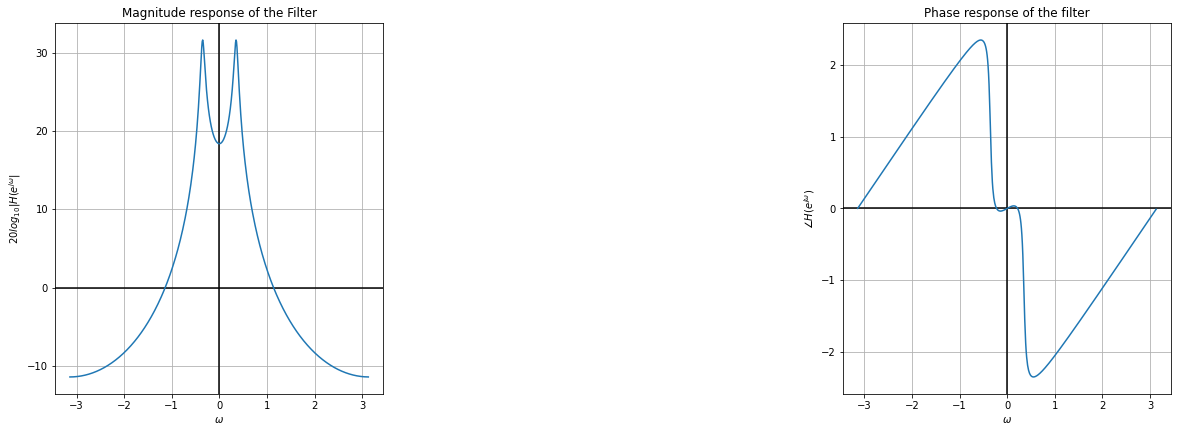

In [ ]:
import matplotlib.pyplot as plt
w = np.arange(-3.14,3.14,0.01)

#Defining H(Z)
H = lambda Z,a,b : 1 / (1 + a*Z**(-1) + b*Z**(-2))

#Z Transform into DTFT
Z = np.exp(1j*w)
f = H(Z,a,b) #Evalutate DTFT for a given value of a and b

#Magnitude response and phase response of the filter 
magnitude = 20*np.log10(np.abs(f))
phase = np.angle(f)

figure = plt.figure(figsize = [20,15])
figure.add_subplot(2,3,1)
plt.title("Magnitude response of the Filter")
plt.xlabel("$\omega$")
plt.ylabel("$20log_{10}|H(e^{j\omega}|$")
plt.axvline(color = "black")
plt.axhline(color = "black")
plt.grid()
plt.plot(w,magnitude)

figure.add_subplot(2,3,3)
plt.title("Phase response of the filter")
plt.xlabel("$\omega$")
plt.ylabel("$\\angle H(e^{j\omega})$")
plt.axvline(color = "black")
plt.axhline(color = "black")
plt.grid()
plt.plot(w,phase)

plt.show()

For impulse response, we obtain it through the following steps.

>> $H(Z) = \frac{Y(Z)}{X(Z)} = \frac{1}{(1  + aZ^{-1} + bZ^{-2})} $ 

>> $Y(Z) = H(Z) \cdot X(Z)$

>> $Y(Z) \cdot {(1  + aZ^{-1} + bZ^{-2})} = X(Z)$

>> $Y(Z)  + a Y(Z) \cdot Z^{-1} + b Y(Z) \cdot Z^{-2} = X(Z)$

Taking inverse Z transform, and assuming the signal to be causal, for DTFT to be stable since $|r|$ < 1 for poles

>> $y[n] + a\cdot y[n-1] + b \cdot y[n-2] = x[n]$

Substituting $x[n] = \delta[n]$, gives $y[n] = h[n]$ = impulse response of the filter

>> $h[n] + a\cdot h[n-1] + b \cdot h[n-2] = \delta [n]$

for $n = 0$ and $n = 1$, we find $h[0]$ and $h[1]$

>> $h[0] + a\cdot h[-1] + b \cdot h[-2] = \delta [0]$, and $h[-1] = h[-2] = 0$ for causal system.

Hence $h[0] = \delta [0] = 1$

>> $h[1] + a\cdot h[0] + b \cdot h[-1] = \delta [1]$

>> $h[1] = -a \cdot h[0] $ 

The following section explains the code of impulse response for a given number of samples, using iteration to generate the final impulse response.




In [ ]:
def response(input_signal,samples, F1, B1, Fs):
  
  a,b = parameters(F1,B1,Fs)
  
  h = np.zeros([samples,1]) #numpy array for impulse response

  h[0] = input_signal[0]                        #calculating h[0]
  h[1] = -a*h[0]                  #calculating h[1]

  for i in range(2,samples):      #iterating from 2 since we need h[2],h[3],h[4],... and delta[n] = 0 for n > 0 
    h[i] = -a*h[i-1] -b*h[i-2] + input_signal[i]

  return h

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


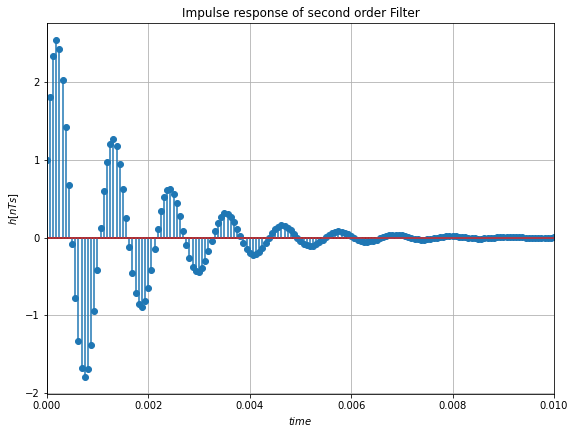

In [ ]:
time = 0.5
Fs = 16000

samples = int(Fs*time)

t = np.linspace(0,time,samples)
n = np.arange(0,samples)

delta = signal.unit_impulse(samples,0)
h = response(delta,samples,F1,B1,Fs)

figure = plt.figure(figsize = [20,15])
figure.add_subplot(2,2,1)
plt.title("Impulse response of second order Filter")
plt.ylabel("$h[nTs]$")
plt.xlabel("$time$")
plt.xlim(0,0.01)
plt.axvline(color = "black")
plt.axhline(color = "black")
plt.grid()
plt.stem(t,h)

plt.show()


# Q2

## Here, we take help of two different periodic signals. First one, we assume to sample a periodic triangular train of frequency equal to $ F_{o} = 140 Hz $ with a sampling frequency of $F_{s} = 16,000 Hz$. Calculations for the same are mentioned in code.

>> Total_samples represents the number of samples in 'time' for which the the periodic train is desired for.
 

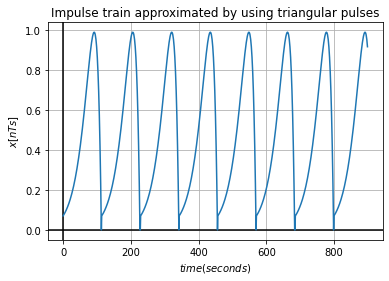

In [ ]:
import matplotlib.pyplot as plt


Fs = 16000
Fo = 140
time = 0.5

def periodic_triangular_train(time,Fs, Fo):

  Total_samples = int(Fs*time)                                                  # Total samples for which sound will be played

  t = np.linspace(0,time,Total_samples+1)                                        #1 is added so as to take care of 0th sample i.e. sample at t = 0
  t = t[0:Total_samples]                                                         #neglecting the last sample, so that to have a array of size 8000 = time*Fs
  x1 = np.zeros((Total_samples,), dtype = np.float128)
  x2 = np.zeros((Total_samples,), dtype = np.float128)                           #To store output

  Total_samples_Fo = int(Fo*time)                                                #Total samples for Fo are calculated here.
                    
  Period_list_time = np.array([i/Fo for i in range(0,Total_samples_Fo + 1)],dtype = np.float128)

  pulse_width = 1/Fs #Taking pulse width equal to 1/Fs so we get atleast a sample while sampling Fo using Fs

  for i in range(0,Total_samples): #iterate over total samples

    for period in Period_list_time:  #take a given period
      
      time_iter = t[i]

      if time_iter > (period - pulse_width/2) and time_iter < (period + pulse_width/2): #if the time instant lies within the width of triangular pulse

        if time_iter <=  (period): #If less, then its value will be as per positive slope
          x1[i] = (time_iter - (period - pulse_width/2)) / (pulse_width/2)        
        elif time_iter >  (period): #if more, then its value will be as per negative slope
          x1[i] = -(time_iter - (period + pulse_width/2)) / (pulse_width/2)

  x2 = np.where(x1!=0,1,0) #New added statement so as to convert the irregular triangular train into Ideal impulse

  return t,x2

t,x = periodic_triangular_train(time,Fs,Fo)

plt.title("Impulse train approximated by using triangular pulses")
plt.ylabel("$x[nTs]$")
plt.xlabel("$time (seconds)$")
plt.axvline(color = "black")
plt.axhline(color = "black")
plt.grid()
plt.plot(x[0:900])

plt.show()


Here we haven't take exact impulses at given instants, due to mismatch in sampling instants not coinciding with the actual period instants of the given Frequency of 140 Hz, which leads to creating such a response rather an ideal impulse train. The sampling of triangular periodic wave at non peak instants also creates this effect

Thus, we use the 'response' function created in Q1. to find the response of the filter to the given input sequence 'x'. This gives out output $y[n]$ which is indicated in the plot below

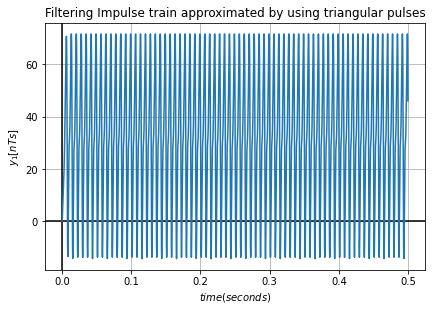

In [ ]:
Total_samples = int(Fs*time)

y1 = response(x,Total_samples,F1,B1,Fs)

figure = plt.figure(figsize = [15,10])

figure.add_subplot(2,2,1)

plt.title("Filtering Impulse train approximated by using triangular pulses")
plt.ylabel("$y_{1}[nTs]$")
plt.xlabel("$time (seconds) $")
plt.axvline(color = "black")
plt.axhline(color = "black")
plt.grid()
plt.plot(t,y1)

plt.show()

As we can note from the output, the input is just a crackling sound since an impulse train contains infinite number of frequencies, whereas the output after passing through the filter has particular frequency components presence due to amplification by the filter. 

Saving the wav files with the corresponding names

In [ ]:
import scipy.io.wavfile
scipy.io.wavfile.write("y1_140_non_ideal_impulse.wav",16000,250*y1.astype(np.int16))

scipy.io.wavfile.write("x1_140_non_ideal_impulse.wav",16000,5000*x.astype(np.int16))

In [ ]:
ID.Audio("y1_140_non_ideal_impulse.wav")

#Q3

(A) Fo , F1, B1 = 120, 300, 100

In [ ]:
Gain = 1000 #Defining the gain for each parameter

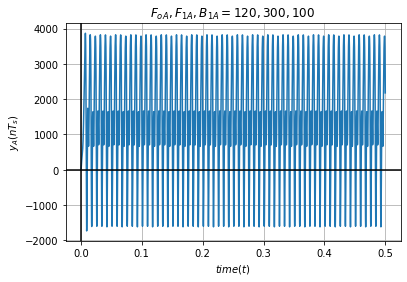

In [ ]:
FoA, F1A, B1A = 120,300,100
Fs = 16000

time_A = 0.5

Total_samples_A = int(Fs*time_A)


delta_A = signal.unit_impulse(Total_samples_A, 0)
hA = response(delta_A, Total_samples_A, F1A, B1A,Fs)

tA, xA = periodic_triangular_train(time_A, Fs, FoA)

yA = Gain*response(xA,Total_samples_A,F1A,B1A,Fs)

plt.plot(tA,yA)
plt.title("$F_{oA}, F_{1A}, B_{1A} = 120,300,100$")
plt.ylabel("$y_{A}(nT_{s})$")
plt.xlabel("$time (t)$")
plt.axvline(color = "black")
plt.axhline(color = "black")
plt.grid()

(B) Fo, F1, B1 = 120,1200,200

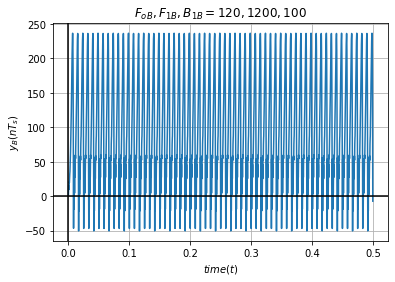

In [ ]:
FoB, F1B, B1B = 120,1200,200
Fs = 16000

time_B = 0.5

Total_samples_B = int(Fs*time_A)

delta_B = signal.unit_impulse(Total_samples_B, 0)
hB = response(delta_B, Total_samples_B, F1B, B1B,Fs)
tB, xB = periodic_triangular_train(time_B, Fs, FoB)

yB = Gain*response(xB,Total_samples_B,F1B,B1B,Fs)

plt.plot(tB,yB)
plt.title("$F_{oB}, F_{1B}, B_{1B} = 120,1200,100$")
plt.ylabel("$y_{B}(nT_{s})$")
plt.xlabel("$time (t)$")
plt.axvline(color = "black")
plt.axhline(color = "black")
plt.grid()


(C) Fo, F1, B1 = 180,300,100

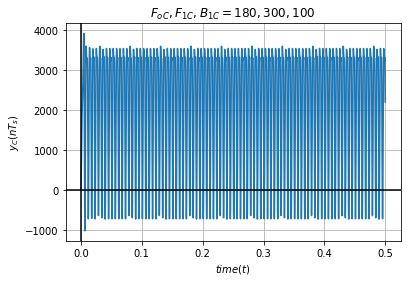

In [ ]:
FoC, F1C, B1C = 180,300,100
Fs = 16000

time_C = 0.5

Total_samples_C = int(Fs*time_C)


delta_C = signal.unit_impulse(Total_samples_C, 0)
hC = response(delta_C, Total_samples_C, F1C, B1C,Fs)

tC, xC = periodic_triangular_train(time_C, Fs, FoC)

yC = Gain*response(xC,Total_samples_C,F1C,B1C,Fs)

plt.plot(tC,yC)
plt.title("$F_{oC}, F_{1C}, B_{1C} = 180,300,100$")
plt.ylabel("$y_{C}(nT_{s})$")
plt.xlabel("$time (t)$")
plt.axvline(color = "black")
plt.axhline(color = "black")
plt.grid()


In [ ]:
scipy.io.wavfile.write("Q3_A.wav", Fs, yA.astype(np.int16))
scipy.io.wavfile.write("Q3_B.wav", Fs, yB.astype(np.int16))
scipy.io.wavfile.write("Q3_C.wav", Fs, yC.astype(np.int16))

In [ ]:
ID.Audio("Q3_A.wav")

In [ ]:

ID.Audio("Q3_B.wav")

In [ ]:

ID.Audio("Q3_C.wav")



### Comment on sound quality 

Sound quality : 

in 3(a) and 3(b), the Formant frequency for filter is different. 120 and 1200. Thus the higher frequency component of impulse train gets amplified for the 3(b) and lower frequency component gets amplified for 120. 3(a) sounds like /o/ and 3(b) sounds like /u/. Thus we can say that formant in /a/ will be having larger value compared to /u/

in 3(a) and 3(c) Fo is different, thus both can be said to utter same vowel but at different pitch. Sounds similar to /u/

#Q4

## Here we created a filter consisting of three formant frequencies at F1 = 730, F2 = 1090 and F3 = 2440. This will lead to amplification of various frequencies, thus lead to vowel sounds. The first sound is represented by vowel /a/, along with the waveform. Second one is represented by vowel /i/ and third one is /o/

## Due to imperfect generation of impulse train sometimes lead to noisy components


## Procedure undertaken here :

##h1 calculated by passing impulse function to the 'response function' defined in this code.

##Similarly h2 and h3 calculated.

##now h1*h2*h3 is obtained using signal.convolve and finally we get the output h for the total filter obtained by multiplying individual filter responses

##Also, calculating the triangular periodic pulses for given value of Fo using 'periodic triangular function' defined in this code

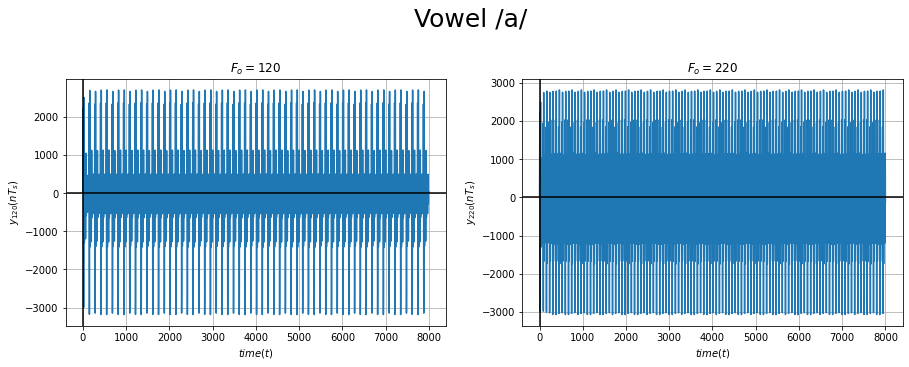

In [ ]:
F1 = 730
F2 = 1090
F3 = 2440

B = 100

Fs = 16000

time_T = 0.5
Total_samples = int(time_T*Fs)
Gain = 50

delta = signal.unit_impulse(Total_samples, 0)
h1=response(delta,Total_samples,F1,B,Fs)
h2=response(delta,Total_samples,F2,B,Fs)
h3=response(delta,Total_samples,F3,B,Fs)

h12 = signal.convolve(h1,h2)
h = signal.convolve(h12,h3)

Fo1 = 120
Fo2 = 220

t,x1 = periodic_triangular_train(time_T,Fs,Fo1)
t,x2 = periodic_triangular_train(time_T,Fs,Fo2)

yA_1 = Gain*signal.convolve(h[0:Total_samples],x1.reshape((Total_samples,1)))[0:Total_samples] 
yB_1 = Gain*signal.convolve(h[0:Total_samples],x2.reshape((Total_samples,1)))[0:Total_samples]


figure= plt.figure(figsize = [15,10])
figure.add_subplot(2,2,1)
figure.suptitle("Vowel /a/",fontsize = 25)

plt.plot(yA_1)
plt.title("$F_{o} = 120$")
plt.ylabel("$y_{120}(nT_{s})$")
plt.xlabel("$time (t)$")
plt.axvline(color = "black")
plt.axhline(color = "black")
plt.grid()

figure.add_subplot(2,2,2)

plt.plot(yB_1)
plt.title("$F_{o} = 220$")
plt.ylabel("$y_{220}(nT_{s})$")
plt.xlabel("$time (t)$")
plt.axvline(color = "black")
plt.axhline(color = "black")
plt.grid()
plt.show()

scipy.io.wavfile.write("Q4_A_Fo_120.wav",Fs,yA_1.astype(np.int16))
scipy.io.wavfile.write("Q4_A_Fo_220.wav",Fs,yB_1.astype(np.int16))

In [ ]:
ID.Audio("Q4_A_Fo_120.wav")

In [ ]:
ID.Audio("Q4_A_Fo_220.wav")

Magnifying both the sound waveforms, we observe that

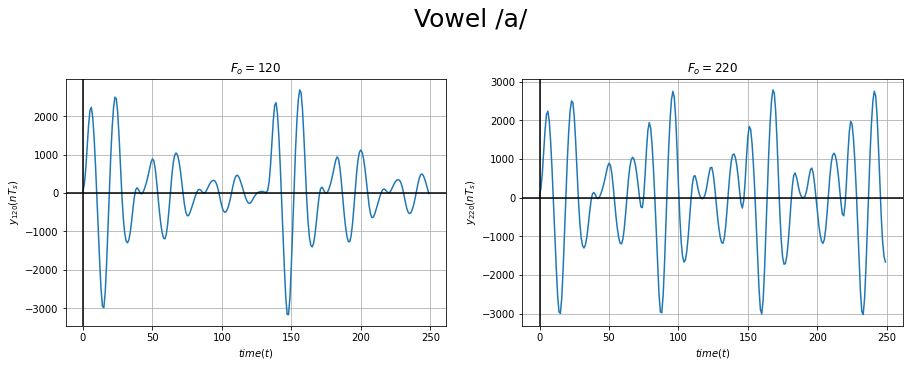

In [ ]:
figure= plt.figure(figsize = [15,10])
figure.add_subplot(2,2,1)
figure.suptitle("Vowel /a/",fontsize = 25)

plt.plot(yA_1[0:250])
plt.title("$F_{o} = 120$")
plt.ylabel("$y_{120}(nT_{s})$")
plt.xlabel("$time (t)$")
plt.axvline(color = "black")
plt.axhline(color = "black")
plt.grid()

figure.add_subplot(2,2,2)

plt.plot(yB_1[0:250])
plt.title("$F_{o} = 220$")
plt.ylabel("$y_{220}(nT_{s})$")
plt.xlabel("$time (t)$")
plt.axvline(color = "black")
plt.axhline(color = "black")
plt.grid()
plt.show()

The part upto approximately first 70 samples is same for both the frequencies. 

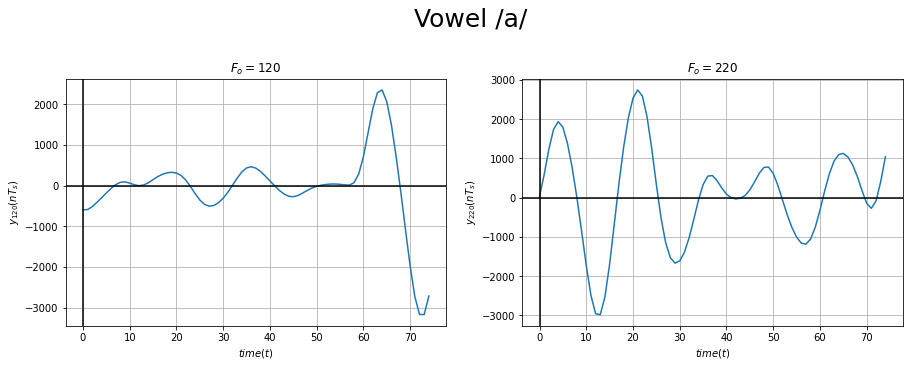

In [ ]:
figure= plt.figure(figsize = [15,10])
figure.add_subplot(2,2,1)
figure.suptitle("Vowel /a/",fontsize = 25)

plt.plot(yA_1[75:150])
plt.title("$F_{o} = 120$")
plt.ylabel("$y_{120}(nT_{s})$")
plt.xlabel("$time (t)$")
plt.axvline(color = "black")
plt.axhline(color = "black")
plt.grid()

figure.add_subplot(2,2,2)

plt.plot(yB_1[75:150])
plt.title("$F_{o} = 220$")
plt.ylabel("$y_{220}(nT_{s})$")
plt.xlabel("$time (t)$")
plt.axvline(color = "black")
plt.axhline(color = "black")
plt.grid()
plt.show()

While for next samples, there is large difference in the waveform of both the signals. Also the observed sound at 220 has a higher pitch compared to the one at 120, the /a/ at 120 has a lower pitch 

## Here, the same thing as above is done for a different set of filter to produce the sound /i/. Again, the filter with F = 220 has a higher pitch compared to F = 120 Hz

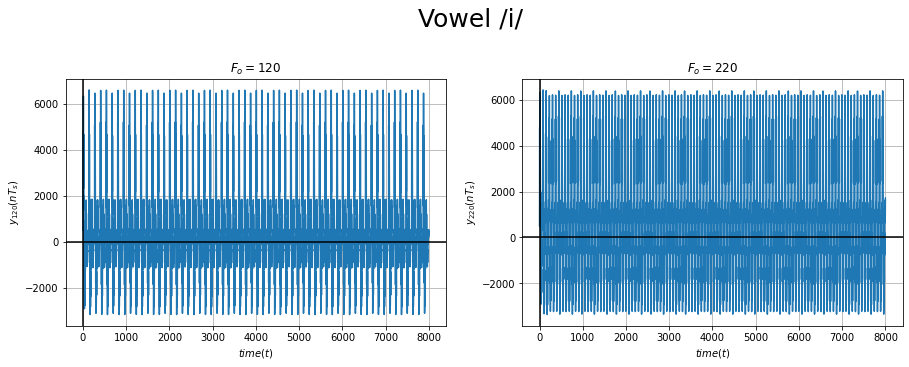

In [ ]:
F1 = 270
F2 = 2290
F3 = 3010

B = 100

Fs = 16000

time_T = 0.5
Total_samples = int(time_T*Fs)
Gain = 500

delta = signal.unit_impulse(Total_samples, 0)
h1=response(delta,Total_samples,F1,B,Fs)
h2=response(delta,Total_samples,F2,B,Fs)
h3=response(delta,Total_samples,F3,B,Fs)

h12 = signal.convolve(h1,h2)
h = signal.convolve(h12,h3)

Fo1 = 120
Fo2 = 220

t,x1 = periodic_triangular_train(time_T,Fs,Fo1)
t,x2 = periodic_triangular_train(time_T,Fs,Fo2)

yA_2 = (Gain*signal.convolve(h[0:Total_samples],x1.reshape((Total_samples,1))))[0:Total_samples]
yB_2 = (Gain*signal.convolve(h[0:Total_samples],x2.reshape((Total_samples,1))))[0:Total_samples]


figure= plt.figure(figsize = [15,10])
figure.suptitle("Vowel /i/",fontsize = 25)

figure.add_subplot(2,2,1)

plt.plot(yA_2)
plt.title("$F_{o} = 120$")
plt.ylabel("$y_{120}(nT_{s})$")
plt.xlabel("$time (t)$")
plt.axvline(color = "black")
plt.axhline(color = "black")
plt.grid()
figure.add_subplot(2,2,2)

plt.plot(yB_2)
plt.title("$F_{o} = 220$")
plt.ylabel("$y_{220}(nT_{s})$")
plt.xlabel("$time (t)$")
plt.axvline(color = "black")
plt.axhline(color = "black")
plt.grid()
plt.show()

scipy.io.wavfile.write("Q4_B_Fo_120.wav",Fs,yA_2.astype(np.int16))
scipy.io.wavfile.write("Q4_B_Fo_220.wav",Fs,yB_2.astype(np.int16))

## Here, the same thing as above is done for a different set of filter to produce the sound /u/. Again, the filter with F = 220 has a higher pitch compared to F = 120 Hz

In [ ]:
ID.Audio("Q4_B_Fo_120.wav")

In [ ]:
ID.Audio("Q4_B_Fo_220.wav")

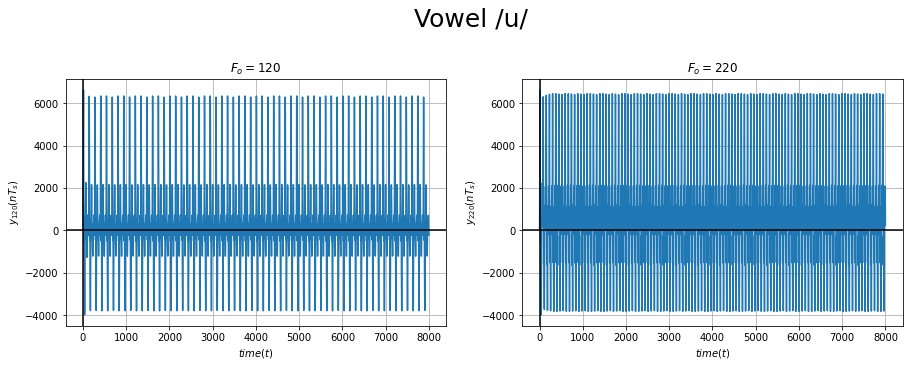

In [ ]:
F1 = 300
F2 = 870
F3 = 2240

B = 100

Fs = 16000

time_T = 0.5
Total_samples = int(time_T*Fs)
Gain = 50

delta = signal.unit_impulse(Total_samples, 0)
h1=response(delta,Total_samples,F1,B,Fs)
h2=response(delta,Total_samples,F2,B,Fs)
h3=response(delta,Total_samples,F3,B,Fs)

h12 = signal.convolve(h1,h2)
h = signal.convolve(h12,h3)

Fo1 = 120
Fo2 = 220

t,x1 = periodic_triangular_train(time_T,Fs,Fo1)
t,x2 = periodic_triangular_train(time_T,Fs,Fo2)

yA_3 = Gain*signal.convolve(h[0:Total_samples],x1.reshape((Total_samples,1)))[0:Total_samples]
yB_3 = Gain*signal.convolve(h[0:Total_samples],x2.reshape((Total_samples,1)))[0:Total_samples]


figure= plt.figure(figsize = [15,10])

figure.suptitle("Vowel /u/",fontsize = 25)
figure.add_subplot(2,2,1)

plt.plot(yA_3)
plt.title("$F_{o} = 120$")
plt.ylabel("$y_{120}(nT_{s})$")
plt.xlabel("$time (t)$")
plt.axvline(color = "black")
plt.axhline(color = "black")
plt.grid()

figure.add_subplot(2,2,2)

plt.plot(yB_3)
plt.title("$F_{o} = 220$")
plt.ylabel("$y_{220}(nT_{s})$")
plt.xlabel("$time (t)$")
plt.axvline(color = "black")
plt.axhline(color = "black")
plt.grid()
plt.show()

scipy.io.wavfile.write("Q4_C_Fo_120.wav",Fs,yA_3.astype(np.int16))
scipy.io.wavfile.write("Q4_C_Fo_220.wav",Fs,yB_3.astype(np.int16))


In all of the three waveforms, we can clearly hear the three vowels, with lower as well as higher pitch. Also one more thing that can be noted is that the relative amplitudes for F = 220 are higher than those at F = 120

In [ ]:
ID.Audio("Q4_C_Fo_120.wav")

In [ ]:
ID.Audio("Q4_C_Fo_220.wav")

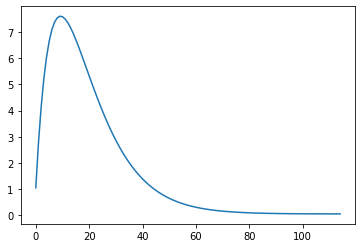

In [ ]:
def glottal():
  w = np.linspace(0,3.14,4001)
  Z = np.exp(1j*w)
  a = 0.95
  H = 1/(1-a*(Z**-1))**2
  #plt.plot(w,20*np.log(1+np.abs(H)))
  y = np.fft.ifft(H)
  return y


y = np.real(glottal())
plt.plot(y[0:115])

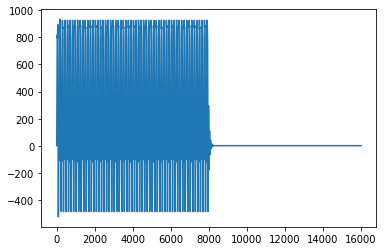

In [ ]:

y2 = np.convolve(y,x1)[0:8000]
h_new = h[0:8000].reshape(8000,)
x = np.convolve(y2,h_new)
plt.plot(x)
scipy.io.wavfile.write("Sample.wav",Fs,20*x[0:8000].astype(np.int16))

ID.Audio("Sample.wav")
